#I. Perkenalan
Nama : Nurul Izzah

Batch : 018

Object : memprediksi default_payment_next_month menggunakan model klasifikasi

Query SQL :
(membuat tabel baru lalu di save di akun bigquery)

CREATE TABLE test.credit_card_default AS
SELECT 

  CAST(sex AS INT64) AS sex,
  CAST(education_level AS INT64) AS education_level,
  CAST(marital_status AS INT64) AS marital_status,
  CAST(pay_5 AS FLOAT64) AS pay_5,
  CAST(pay_6 AS FLOAT64) AS pay_6,
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month,
  limit_balance, age, pay_0, pay_2, pay_3, pay_4, 
  bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, 
  pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6

FROM bigquery-public-data.ml_datasets.credit_card_default
LIMIT 35982;

(mengambil semua data yg sudah di save dan diedit)

SELECT * FROM galvanic-crow-375802.test.credit_card_default;

#II. Import Libraries

In [87]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics


from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

import pickle
import json

In [88]:
#read dataset
df = pd.read_csv('/content/h8dsft_P1M1_Nurul-Izzah (1).csv')

#III. Data Loading

In [89]:
#show dataset
df

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,1,1,0,0,0,460000,49,0,0,...,295807,291616,289529,289449,13200,14000,11500,10500,10500,10000
1,1,1,1,0,0,0,240000,53,0,0,...,133385,136654,136639,123951,9700,5000,5500,5500,5000,5000
2,2,1,1,0,0,0,110000,51,0,0,...,92724,94573,65034,66241,3771,3656,3687,2476,2406,2427
3,2,1,2,0,0,0,110000,23,0,0,...,76460,60136,41872,38158,3400,4000,2951,1600,1540,1400
4,2,1,1,0,0,0,320000,42,0,0,...,103278,62891,64948,66961,9000,6000,3000,3000,3000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,1,1,1,-1,-1,0,390000,46,-1,-1,...,53796,6009,9096,3267,94921,53796,6009,9096,3267,2901
2961,2,1,1,-1,-1,0,350000,55,-1,-1,...,1630,7461,4124,1261,1935,1630,7461,4124,1261,2798
2962,2,1,2,-1,-1,0,460000,34,-1,-1,...,21494,12657,5739,10184,8869,23664,12659,5752,10192,7419
2963,2,2,2,-1,-1,0,160000,29,-1,-1,...,1086,1874,2920,0,2108,1086,1874,2920,0,1222


- data ini terdiri dari 2965 baris dan 24 kolom
- Terdapat beberapa kolom yang mengindikasikan informasi tentang pengguna, seperti jenis kelamin (sex), tingkat pendidikan (education_level), status pernikahan (marital_status), dan usia (age)
- Terdapat kolom default_payment_next_month yang merupakan target prediksi dari model, yaitu apakah pengguna akan mengalami gagal bayar pada bulan berikutnya atau tidak.
- Terdapat juga kolom limit_balance yang menunjukkan batas kredit pengguna

In [90]:
#menduplikat data agar tidak kehilangan data asli
df_copy = df.copy()

In [91]:
#melihat 10 data teratas
df.head(10)

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,1,1,0,0,0,460000,49,0,0,...,295807,291616,289529,289449,13200,14000,11500,10500,10500,10000
1,1,1,1,0,0,0,240000,53,0,0,...,133385,136654,136639,123951,9700,5000,5500,5500,5000,5000
2,2,1,1,0,0,0,110000,51,0,0,...,92724,94573,65034,66241,3771,3656,3687,2476,2406,2427
3,2,1,2,0,0,0,110000,23,0,0,...,76460,60136,41872,38158,3400,4000,2951,1600,1540,1400
4,2,1,1,0,0,0,320000,42,0,0,...,103278,62891,64948,66961,9000,6000,3000,3000,3000,3000
5,2,1,2,0,0,0,90000,33,0,0,...,59753,61755,63629,54423,2100,4000,3000,3000,2323,2000
6,2,1,2,0,0,0,20000,23,0,0,...,17146,16319,15687,16948,2000,2080,2000,600,1500,1000
7,2,1,1,0,2,1,100000,44,0,0,...,73525,75303,79994,78550,5000,3000,3000,5900,0,5000
8,1,2,1,0,0,0,20000,45,0,0,...,16749,17538,13840,7370,1896,1417,1206,284,147,4937
9,1,2,2,0,0,0,50000,34,0,-1,...,49805,27605,29447,30045,91000,1200,600,29057,1076,1300


Data ini menunjukkan informasi mengenai data awal yang terdiri dari 10 baris dan 24 kolom

In [92]:
#melihat 10 data terbawah
df.tail(10)

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2955,1,3,2,-1,-1,0,20000,23,-1,2,...,380,390,0,780,0,380,400,0,780,0
2956,2,2,1,-1,-1,1,160000,36,-1,-1,...,6109,2500,2689,0,2242,6745,2500,2689,0,0
2957,1,3,1,-1,0,0,300000,45,-1,-1,...,780,390,780,780,390,780,0,780,0,0
2958,1,3,2,-1,-1,0,350000,36,-1,-1,...,12622,18103,13547,38868,6088,12635,18119,13547,38868,4650
2959,2,2,1,-1,-1,0,200000,34,-1,-1,...,390,561,390,390,390,390,561,390,390,390
2960,1,1,1,-1,-1,0,390000,46,-1,-1,...,53796,6009,9096,3267,94921,53796,6009,9096,3267,2901
2961,2,1,1,-1,-1,0,350000,55,-1,-1,...,1630,7461,4124,1261,1935,1630,7461,4124,1261,2798
2962,2,1,2,-1,-1,0,460000,34,-1,-1,...,21494,12657,5739,10184,8869,23664,12659,5752,10192,7419
2963,2,2,2,-1,-1,0,160000,29,-1,-1,...,1086,1874,2920,0,2108,1086,1874,2920,0,1222
2964,2,2,1,-1,-1,0,210000,48,-1,-1,...,355,12816,0,102,0,358,12816,0,102,210


Data ini menunjukkan informasi mengenai data akhir yang terdiri dari 10 baris dan 24 kolom

In [93]:
#melihat tipe data dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   sex                         2965 non-null   int64
 1   education_level             2965 non-null   int64
 2   marital_status              2965 non-null   int64
 3   pay_5                       2965 non-null   int64
 4   pay_6                       2965 non-null   int64
 5   default_payment_next_month  2965 non-null   int64
 6   limit_balance               2965 non-null   int64
 7   age                         2965 non-null   int64
 8   pay_0                       2965 non-null   int64
 9   pay_2                       2965 non-null   int64
 10  pay_3                       2965 non-null   int64
 11  pay_4                       2965 non-null   int64
 12  bill_amt_1                  2965 non-null   int64
 13  bill_amt_2                  2965 non-null   int64
 14  bill_amt

- Terdapat 2965 data dengan 24 kolom
- semua data bertipe data interger
- semua data sudah dalam bentuk numerik, sehingga tidak perlu di encoder

In [94]:
#deskriptif analis
df.describe()

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000
mean,1.607757,1.849578,1.559865,-0.225295,-0.254637,0.214165,163369.308600,35.193255,0.005059,-0.122428,...,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518
std,0.488333,0.778184,0.522317,1.159003,1.167305,0.410311,125030.415472,9.109439,1.114395,1.180784,...,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,...,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,50000.000000,28.000000,-1.000000,-1.000000,...,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,140000.000000,34.000000,0.000000,0.000000,...,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,230000.000000,41.000000,0.000000,0.000000,...,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000
max,2.000000,6.000000,3.000000,7.000000,7.000000,1.000000,800000.000000,69.000000,8.000000,7.000000,...,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


dari data tersebut, bisa disimpulkan :

- Rata-rata umur nasabah adalah 35 tahun dengan rentang usia antara 21 sampai 69 tahun.

- Rata-rata limit_balance (batas kredit) nasabah adalah 163,369.31 dengan standar deviasi 125,030.42. Nilai minimum limit_balance adalah 10,000 dan nilai maksimumnya adalah 800,000.

- Rata-rata tagihan bulanan (bill_amt) nasabah pada bulan ke-3 sampai ke-6 adalah lebih tinggi dibandingkan bulan sebelumnya.

- Rata-rata jumlah pembayaran (pay_amt) nasabah pada bulan ke-1 sampai ke-3 lebih rendah dibandingkan bulan berikutnya.

- Proporsi nasabah yang mengalami default payment next month adalah sekitar 21%.

- Mayoritas nasabah berjenis kelamin wanita (rata-rata 1.61).

- Mayoritas nasabah memiliki pendidikan level 2 (rata-rata 1.85).

- Mayoritas nasabah sudah menikah (rata-rata 1.56).

- Rata-rata nilai pay_0 dan pay_2 adalah mendekati 0, yang menunjukkan mayoritas nasabah membayar tagihan mereka pada waktu yang tepat.

- Sedangkan nilai pay_5 dan pay_6 cenderung negatif, yang berarti sebagian besar nasabah melakukan pembayaran keterlambatan pada bulan tersebut.

#IV. Exploratory Data Analysis (EDA)

> Melihat apakah variabel jenis kelamin mempengaruhi kemungkinan default_payment_next_month.

In [95]:
# Menghitung jumlah pria dan wanita yang melakukan default_payment_next_month
men_default = df.loc[(df['sex'] == 1) & (df['default_payment_next_month'] == 1), 'default_payment_next_month'].count()
women_default = df.loc[(df['sex'] == 2) & (df['default_payment_next_month'] == 1), 'default_payment_next_month'].count()

# Menampilkan hasil
print('Jumlah pria yang melakukan default_payment_next_month:', men_default)
print('Jumlah wanita yang melakukan default_payment_next_month:', women_default)

Jumlah pria yang melakukan default_payment_next_month: 262
Jumlah wanita yang melakukan default_payment_next_month: 373


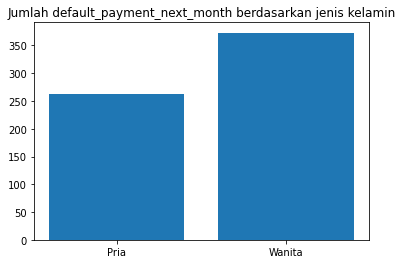

In [96]:
# Membuat visualisasi
labels = ['Pria', 'Wanita']
values = [men_default, women_default]
plt.bar(labels, values)
plt.title('Jumlah default_payment_next_month berdasarkan jenis kelamin')
plt.show()

- dapat dilihat bahwa jumlah wanita yang melakukan default_payment_next_month lebih tinggi dibandingkan dengan jumlah pria. Jumlah pria yang melakukan default_payment_next_month sebanyak 262, sedangkan jumlah wanita yang melakukan default_payment_next_month sebanyak 373

> Melihat apakah variabel tingkat pendidikan mempengaruhi kemungkinan default_payment_next_month.

In [97]:
#groupping
edu_default = df.groupby(['education_level', 'default_payment_next_month'])['default_payment_next_month'].count()

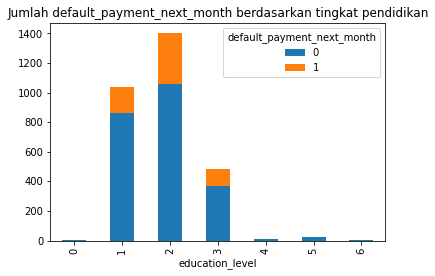

In [98]:
# Membuat visualisasi
edu_default.unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah default_payment_next_month berdasarkan tingkat pendidikan')
plt.show()

dari visualisasi tersebut, terlihat education_level 2 memiliki jumlah terbanyak sekitar 1400 untuk default_payment_next_month class 1 dan 1000 untuk default_payment_next_month class 0 diantara yg lainnya yg di education_level 1 memiliki jumlah 1000 untuk default_payment_next_month class 1 dan sekitar 900 untuk default_payment_next_month class 0 dan education_level 3 memiliki jumlah sekitar 390 untuk default_payment_next_month class 0 dan default_payment_next_month untuk class 1 nya sekitar 450

> Melihat apakah variabel status pernikahan mempengaruhi kemungkinan default_payment_next_month.

In [99]:
# groupping
marital_default = df.groupby(['marital_status', 'default_payment_next_month'])['default_payment_next_month'].count()

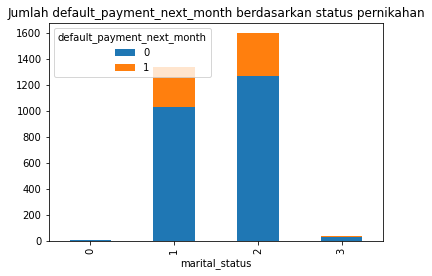

In [100]:
# Membuat visualisasi
marital_default.unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah default_payment_next_month berdasarkan status pernikahan')
plt.show()


dari visualisasi tersebut terlihat marital_status class 2 tertinggi untuk default_payment_next_month class 1 memiliki jumlah 1600 dan untuk default_payment_next_month class 0 mmiliki jumlah sekitar 1250. sementara untuk marital_status class 1 untuk default_payment_next_month class 1 memiliki jumlah sekitar 1350 dan default_payment_next_month class 0 memiliki jumlah 1000  

> Melihat apakah variabel limit saldo kredit mempengaruhi kemungkinan default_payment_next_month.

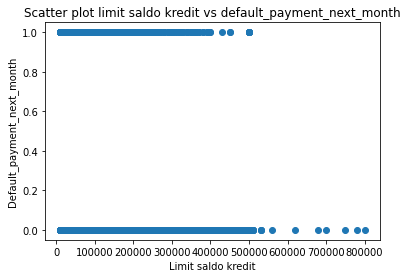

In [101]:
# Membuat visualisasi scatter plot
plt.scatter(df['limit_balance'], df['default_payment_next_month'])
plt.title('Scatter plot limit saldo kredit vs default_payment_next_month')
plt.xlabel('Limit saldo kredit')
plt.ylabel('Default_payment_next_month')
plt.show()

hasil visualisasinya menujukan default_payment_next_month di class 1 titik berhenti di 500000 sedangkan untuk class 0 berhenti di 800000

> Melihat apakah variabel umur mempengaruhi kemungkinan default_payment_next_month.

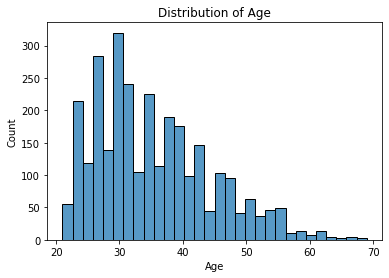

In [102]:
# create histogram of age column
plt.figure()
sns.histplot(data=df, x='age', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

distribusi nilai dalam kolom age tertinggi ada di usia 30 dan kemudian menurun secara bertahap hingga usia 70, maka dapat disimpulkan bahwa mayoritas nasabah dalam dataset berada pada rentang usia antara 20 hingga 70 tahun

> Melihat apakah variabel pembayaran sebelumnya mempengaruhi kemungkinan default_payment_next_month.

In [103]:
# select columns to explore
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

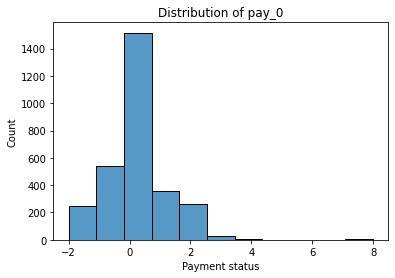

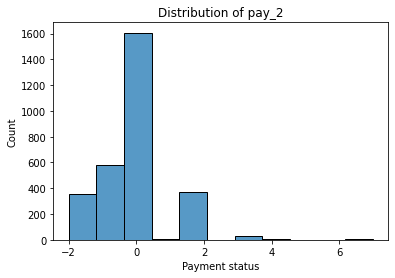

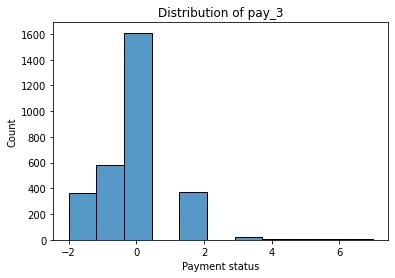

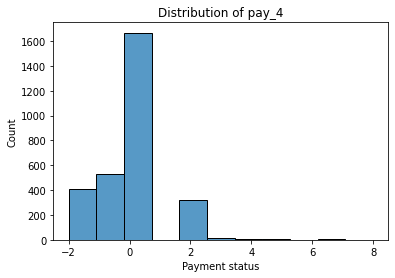

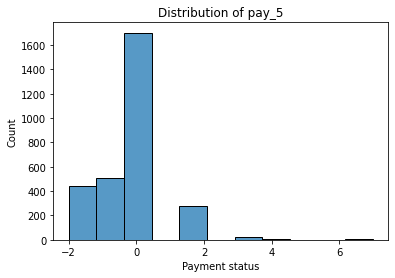

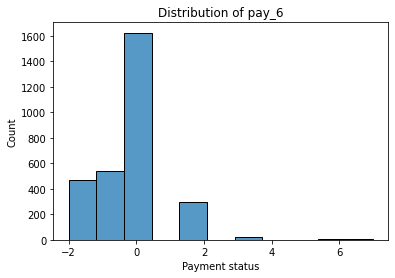

In [104]:
# create histogram for each pay column
for col in pay_cols:
    plt.figure()
    sns.histplot(data=df, x=col, bins=11)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Payment status')
    plt.ylabel('Count')
    plt.show()

semua distribusi datanya berada di sebelah kiri namun cenderung terdistribusi normal

> Melihat apakah variabel jumlah tagihan sebelumnya mempengaruhi kemungkinan default_payment_next_month.

In [105]:
# select columns
bill_cols = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']

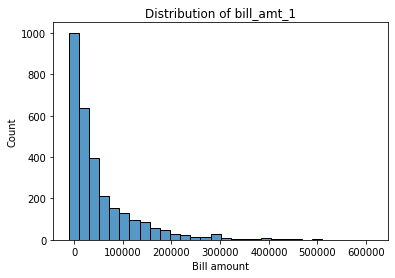

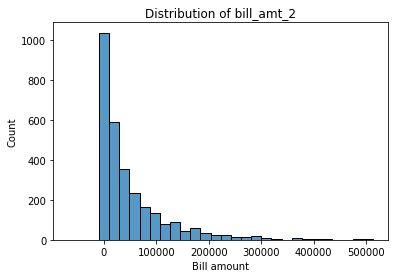

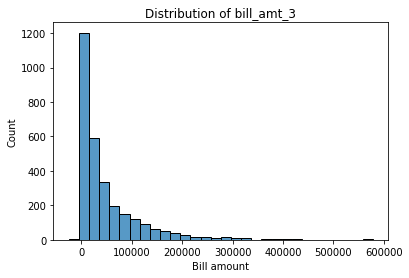

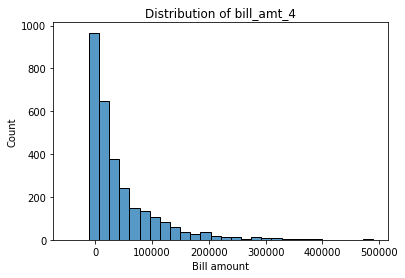

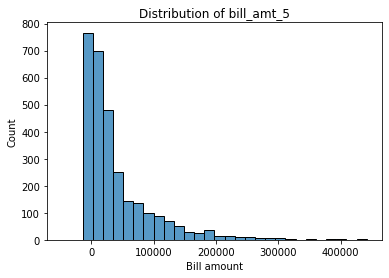

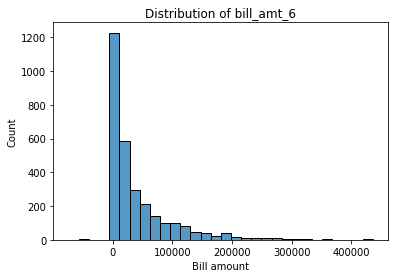

In [106]:
# create histogram for each bill column
for col in bill_cols:
    plt.figure()
    sns.histplot(data=df, x=col, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Bill amount')
    plt.ylabel('Count')
    plt.show()

disimpulkan bahwa sebagian besar nasabah memiliki tagihan yang relatif kecil atau bahkan tidak memiliki tagihan pada bulan tersebut. Hal ini dapat menjadi indikasi bahwa sebagian besar nasabah cenderung membayar tagihan kredit mereka secara tepat waktu.

> Melihat apakah variabel jumlah pembayaran sebelumnya mempengaruhi kemungkinan default_payment_next_month

In [107]:
#select column
pay_cols = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

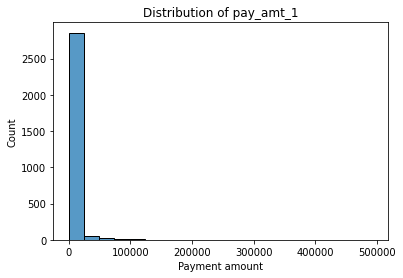

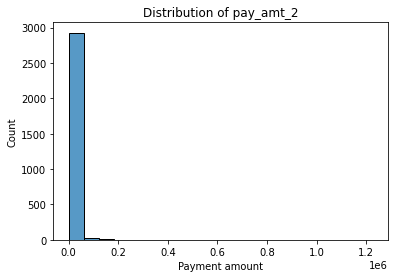

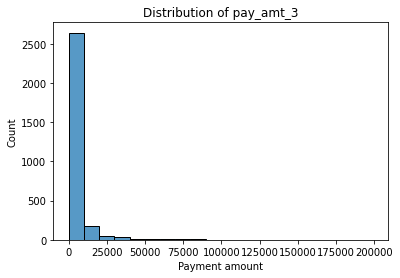

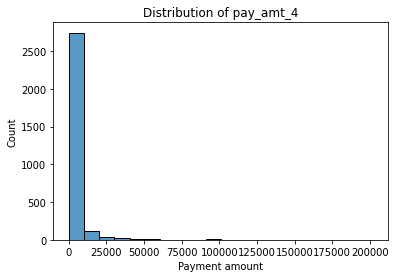

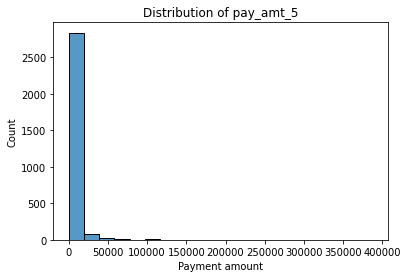

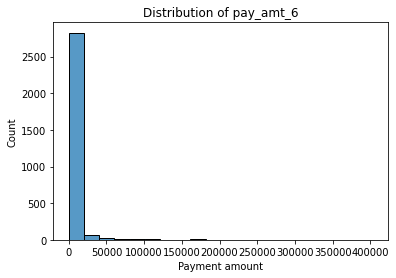

In [108]:
# create histogram for each pay amount column
for col in pay_cols:
    plt.figure()
    sns.histplot(data=df, x=col, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Payment amount')
    plt.ylabel('Count')
    plt.show()

In [109]:
# calculate mean payment amount for each column
mean_payments = df[pay_cols].mean()
print(mean_payments)

pay_amt_1    6348.902867
pay_amt_2    6272.494435
pay_amt_3    5150.497133
pay_amt_4    4561.376054
pay_amt_5    4913.286678
pay_amt_6    5382.701518
dtype: float64


dari hasil visualisasi dan perhitungan rata-rata, terlihat bahwa sebagian besar nasabah melakukan pembayaran dalam jumlah yang relatif kecil. Hal ini juga terbukti bahwa nilai rata-rata pembayaran pada setiap bulan cenderung lebih rendah dari batas kredit yang diberikan pada nasabah

#V. Data Preprosessing

###Split between X (Features), y (Target)

In [110]:
# Memisahkan data input dan data target
X = df.drop(["default_payment_next_month"], axis=1) 
y = df["default_payment_next_month"]
X

,sex,education_level,marital_status,pay_5,pay_6,limit_balance,age,pay_0,pay_2,pay_3,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,1,1,0,0,460000,49,0,0,0,...,295807,291616,289529,289449,13200,14000,11500,10500,10500,10000
1,1,1,1,0,0,240000,53,0,0,0,...,133385,136654,136639,123951,9700,5000,5500,5500,5000,5000
2,2,1,1,0,0,110000,51,0,0,0,...,92724,94573,65034,66241,3771,3656,3687,2476,2406,2427
3,2,1,2,0,0,110000,23,0,0,0,...,76460,60136,41872,38158,3400,4000,2951,1600,1540,1400
4,2,1,1,0,0,320000,42,0,0,0,...,103278,62891,64948,66961,9000,6000,3000,3000,3000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,1,1,1,-1,-1,390000,46,-1,-1,-1,...,53796,6009,9096,3267,94921,53796,6009,9096,3267,2901
2961,2,1,1,-1,-1,350000,55,-1,-1,-1,...,1630,7461,4124,1261,1935,1630,7461,4124,1261,2798
2962,2,1,2,-1,-1,460000,34,-1,-1,-1,...,21494,12657,5739,10184,8869,23664,12659,5752,10192,7419
2963,2,2,2,-1,-1,160000,29,-1,-1,-1,...,1086,1874,2920,0,2108,1086,1874,2920,0,1222


setelah di split, data X menjadi hanya 2965 baris dan 23 kolom karena data target sudah di pisahkan

###Feature Selection

menghitung koefisien korelasi kendall dan p-value untuk setiap fitur pada dataset untuk menentukan fitur-fitur yang memiliki korelasi yang signifikan dengan variabel target 

In [111]:
#menghitung koefisien korelasi kendall dan p-value untuk setiap fitur
corr_coef = []
p_value = []
for feature in X.columns:
    coef, p = kendalltau(X[feature], y)
    corr_coef.append(coef)
    p_value.append(p)

In [112]:
#menggabungkan hasil
kendall_results = pd.DataFrame({'feature': X.columns, 'corr_coef': corr_coef, 'p_value': p_value})

In [113]:
#mngurutan berdasarkan nilai koefisien korelasi
kendall_results = kendall_results.sort_values(by='corr_coef', ascending=False)

In [114]:
#melihat hasil dari seleksi fitur
kendall_results

,feature,corr_coef,p_value
7,pay_0,0.300573,7.240402e-71
8,pay_2,0.229146,6.336351e-41
9,pay_3,0.211919,3.329476e-35
3,pay_5,0.197312,1.661341e-30
10,pay_4,0.196775,1.907502e-30
4,pay_6,0.181257,3.897521e-26
1,education_level,0.057750,9.197740e-04
16,bill_amt_6,0.023719,1.163445e-01
15,bill_amt_5,0.018755,2.139745e-01
14,bill_amt_4,0.014521,3.353631e-01


dapat dilihat bahwa fitur dengan koefisien korelasi kendall tertinggi dengan target variabel adalah pay_0, pay_2, pay_3, pay_5, pay_4, pay_6. karena menurut pribadi juga, apabila untuk pembayaran dari awal hingga ke 6 lancar, maka kan lancar juga untuk kedepannya

In [115]:
#mengambil data yg sudah di sekelsi
selected_features = X.iloc[:, [7, 8, 9, 3, 10, 4]]

In [116]:
#melihat data yg telah diseleksi
X_new = selected_features
X_new

,pay_0,pay_2,pay_3,pay_5,pay_4,pay_6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
2960,-1,-1,-1,-1,-1,-1
2961,-1,-1,-1,-1,-1,-1
2962,-1,-1,-1,-1,-1,-1
2963,-1,-1,-1,-1,-1,-1


Data yang sudah dipilih fitur terdiri dari kolom-kolom yang menunjukkan nilai pembayaran bulan sebelumnya (pay_0, pay_2, pay_3, pay_4, pay_5, pay_6) dari sejumlah nasabah. Nilai-nilai ini dapat membantu dalam memprediksi apakah nasabah tersebut akan gagal membayar tagihan bulanan berikutnya. Nilai kolom di setiap baris menunjukkan apakah nasabah tersebut membayar tagihan tepat waktu (nilai 0), atau mengalami keterlambatan (nilai lebih dari 1). Ada beberapa nasabah yang tampaknya mengalami keterlambatan dalam membayar tagihan mereka, seperti yang terlihat dari nilai minus di kolom-kolom tersebut.

In [117]:
# mengubah urutan kolom
new_index = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
X = X_new.reindex(columns=new_index)

In [118]:
# Membagi data menjadi x train, x test dan y train, y test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=15)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (2075, 6)
Test Size  :  (890, 6)


,pay_0,pay_2,pay_3,pay_5,pay_4,pay_6
2544,0,0,0,-1,0,0
1068,0,0,0,0,0,0
1443,2,2,2,0,0,0
2377,1,-1,-1,-2,-2,-2
1230,0,0,0,0,0,0
...,...,...,...,...,...,...
1739,0,0,0,2,0,2
2715,-1,-1,-1,-1,-1,-1
2204,-2,-2,-2,-2,-2,-2
2432,2,2,2,3,2,2


##Handling Outlier

In [119]:
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

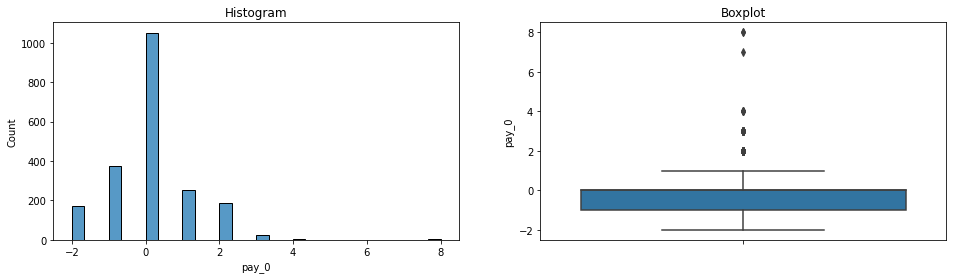


Skewness Value :  0.797671352671864


In [120]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_0')
print('\nSkewness Value : ', X_train['pay_0'].skew())

Distribusi data pada fitur "pay_0" cenderung condong ke arah nilai positif, namun tidak terlalu signifikan. Hal ini menunjukkan bahwa mayoritas nasabah cenderung membayar tepat waktu atau terlambat sedikit, sedangkan ada sebagian kecil nasabah yang sering terlambat membayar dengan jangka waktu yang lebih lama.

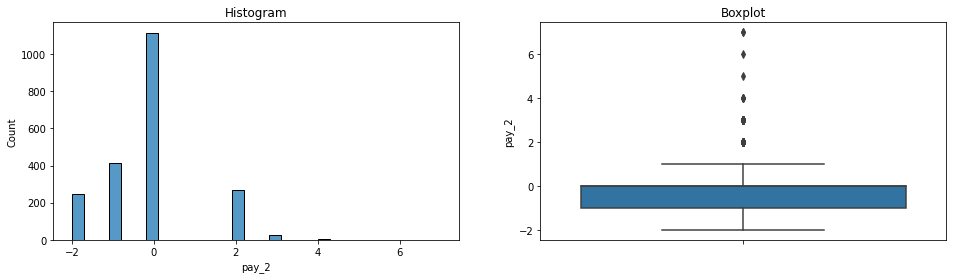


Skewness Value :  0.8155161627337468


In [121]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_2')
print('\nSkewness Value : ', X_train['pay_2'].skew())

sebagian besar orang nasabah membayar tagihan mereka tepat waktu pada bulan kedua. Selain itu, terdapat kemiringan ke kanan dengan nilai skewness sebesar 0.8155, yang menunjukkan bahwa terdapat lebih banyak orang yang membayar tagihan mereka tepat waktu pada bulan kedua daripada yang membayar terlambat

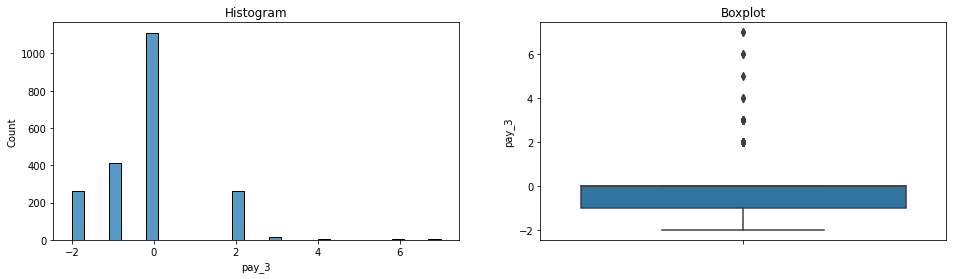


Skewness Value :  0.9842041016750367


In [122]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_3')
print('\nSkewness Value : ', X_train['pay_3'].skew())

 distribusi data tidak terlalu simetris, mayoritas nasabah memiliki keterlambatan pembayaran selama 1 atau 2 bulan dan sedikit nasabah yang mengalami keterlambatan pembayaran selama 4-7 bulan

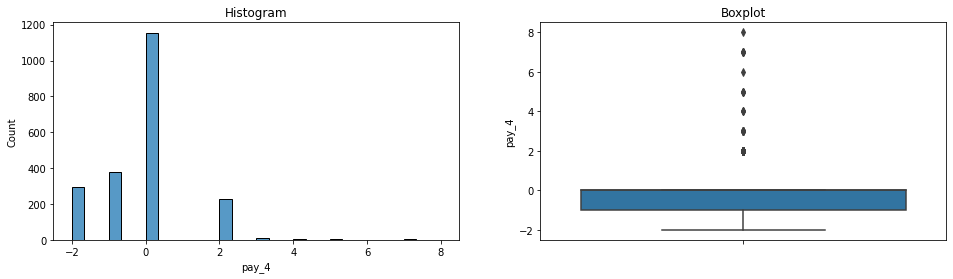


Skewness Value :  1.1939985226230136


In [123]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_4')
print('\nSkewness Value : ', X_train['pay_4'].skew())

distribusi data pay_4 cukup simetris dengan kecenderungan yang sama kuat pada nilai-nilai negatif dan positif. mayoritas nasabah memiliki riwayat pembayaran pay_4 yang baik, yaitu dengan nilai 0. Namun, terdapat pula sebagian kecil nasabah yang memiliki riwayat pembayaran pay_4 yang buruk

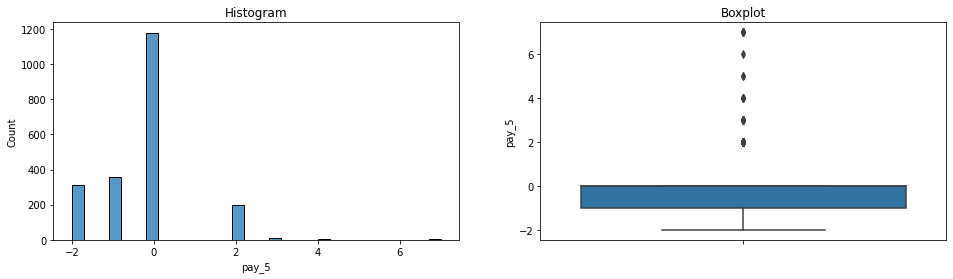


Skewness Value :  1.1528932090206132


In [124]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_5')
print('\nSkewness Value : ', X_train['pay_5'].skew())

mayoritas nasabah membayar tagihan kredit mereka tepat waktu, namun masih ada sebagian kecil yang terlambat dalam pembayaran. Distribusi data cenderung condong ke kanan, menunjukkan adanya beberapa nasabah yang sering terlambat dalam pembayaran

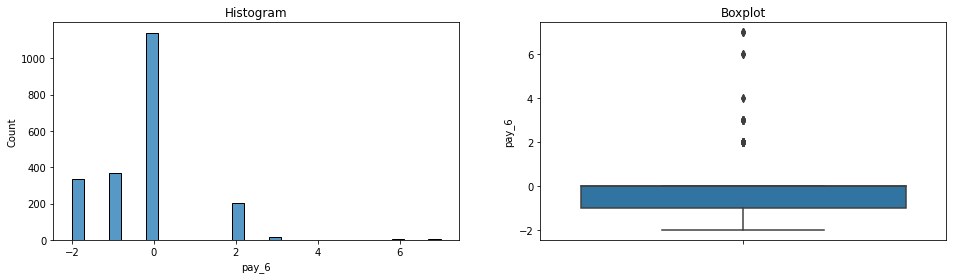


Skewness Value :  1.077598474055725


In [125]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_6')
print('\nSkewness Value : ', X_train['pay_6'].skew())

distribusi data pay_6 condong ke kanan. dan juga dapat dilihat bahwa mayoritas nilai pay_6 berada pada kategori 0 (tidak terlambat membayar), dengan jumlah count kurang lebih sebanyak 1100. Sedangkan untuk kategori terlambat membayar, pay_6 -2 memiliki jumlah count terbanyak kurang lebih sebesar 300

Overall statment : semua data memiliki distribusi yang cukup simetris, maka tidak perlu dilakukan handling pada outliers karena hal tersebut tidak akan mempengaruhi distribusi data secara signifikan

##Handling Missing Value

In [126]:
#melihat missing value di data X_train 
X_train.isnull().sum()

pay_0    0
pay_2    0
pay_3    0
pay_5    0
pay_4    0
pay_6    0
dtype: int64

In [127]:
#melihat missing value di data X_test
X_test.isnull().sum()

pay_0    0
pay_2    0
pay_3    0
pay_5    0
pay_4    0
pay_6    0
dtype: int64

In [128]:
#melihat missing value di data y_train
y_train.isnull().sum()

0

In [129]:
#melihat missing value di data y_test
y_test.isnull().sum()

0

setelah di cek, didatanya tidak terdapat missing value

##Feature Scaling

menggunakan standardscaler adalah untuk menormalisasi dan menyeimbangkan data karena datanya memiliki distribusi normal

In [130]:
# Menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
#membuat object pipeline untuk logistic regression
pipe_logistic = Pipeline([
    ("scaler", StandardScaler()),
    ("LogisticRegression", LogisticRegression())
])

In [132]:
#membuat object pipeline untuk SVM
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

In [133]:
#membuat object pipeline untuk Decision Tree
pipe_dt = Pipeline([
    ('DecisionTree', DecisionTreeClassifier(criterion='gini'))
])

In [134]:
#membuat object pipeline untuk KNN
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
])


In [135]:
#membuat object pipeline untuk Naive Bayes
pipe_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('NaiveBayes', GaussianNB())
])

In [136]:
#membuat object pipeline untuk Random Forest dengan 500 pohon
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('RandomForest', RandomForestClassifier(n_estimators=500, random_state=18))
])

In [137]:
#membuat object pipeline untuk Gradient Boosting
pipe_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('GradientBoosting', GradientBoostingClassifier())
])

#VI. Model Definition

MOdel yg digunakan
- Logistic Regression = untuk memprediksi probabilitas default_payment_next_month pada data yang biner atau multikelas
- SVM = memprediksi default_payment_next_month dengan mencari hyperplane terbaik yang dapat memisahkan antara individu yang akan mengalami default_payment_next_month dan yang tidak
- Decision Tree = ntuk memprediksi default_payment_next_month dengan membuat struktur pohon dari data input
- Random Forest = memprediksi default_payment_next_month dengan menggabungkan beberapa pohon keputusan yang dibuat secara acak untuk mengurangi overfitting dan meningkatkan keakuratan
- KNN =  untuk memprediksi default_payment_next_month dengan mengklasifikasikan individu berdasarkan kelas mayoritas dari data terdekat di sekitarnya
- Naive Bayes = untuk memprediksi default_payment_next_month dengan menghitung probabilitas setiap kelas pada data input.

menggunakan metriks ROC-OUC untuk mengevaluasi performa model klasifikasi pada data yang seimbang atau tidak seimbang

menggunakan StandartdScaler untuk mengubah nilai-nilai data menjadi memiliki skala yang sama dan berdistribusi normal dengan mean 0 dan variance 1

#VII. Model Training

##Logistic Regression

In [138]:
#training model Logistic Regression
pipe_logistic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

In [139]:
# Memprediksi label pada data test
y_pred_log = pipe_logistic.predict(X_test)

##SVM

In [140]:
#training model SVM
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [141]:
# Memprediksi label pada data test
y_pred_svm = pipe_svm.predict(X_test)

##Decision Tree

In [142]:
#training model Decision Tree
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('DecisionTree', DecisionTreeClassifier())])

In [143]:
# Memprediksi label pada data test
y_pred_dt = pipe_dt.predict(X_test)

##K-Neighbors (KNN)

In [144]:
#training model KNN
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=6))])

In [145]:
# Memprediksi label pada data test
y_pred_knn = pipe_knn.predict(X_test)

##Naive Bayes

In [146]:
#training model Naive Bayes
pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('NaiveBayes', GaussianNB())])

In [147]:
# Memprediksi label pada data test
y_pred_nb = pipe_nb.predict(X_test)

##Random Forest

In [148]:
#training model Random Forest
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest',
                 RandomForestClassifier(n_estimators=500, random_state=18))])

In [149]:
# Memprediksi label pada data test
y_pred_rf = pipe_rf.predict(X_test)

##Gradient Boosting

In [150]:
#traning model Gradient Boosting
pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GradientBoosting', GradientBoostingClassifier())])

In [151]:
#prediksi model
y_pred_gb = pipe_gb.predict(X_test)

#VIII. Model Evaluation

##Logistic Regression

In [152]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_log = pipe_logistic.predict_proba(X_test)[:,1]
auc_score_log = roc_auc_score(y_test, y_pred_proba_log)
print("ROC AUC Score:", auc_score_log)

ROC AUC Score: 0.7029738031576267


In [153]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

auc_score_log = roc_auc_score(y_test, y_pred_proba_log)
print(f"AUC-ROC Score: {auc_score_log:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       714
           1       0.66      0.34      0.45       176

    accuracy                           0.83       890
   macro avg       0.76      0.65      0.68       890
weighted avg       0.82      0.83      0.81       890

AUC-ROC Score: 0.703


model logistic regression memiliki akurasi sebesar 0.83, yang berarti model berhasil memprediksi 83% data dengan benar. Namun, recall untuk class 1 (orang yang gagal membayar) cukup rendah, yaitu sebesar 0.34, yang berarti model cenderung banyak memprediksi orang yang sebenarnya mampu membayar sebagai orang yang gagal membayar.

##SVM

In [154]:
# Predict the probabilities of the test set
y_pred_proba_svm = pipe_svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
print(f"ROC AUC score: {roc_auc_svm}")

ROC AUC score: 0.6863501082251081


In [155]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

auc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)
print(f"AUC-ROC Score: {auc_score_svm:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       714
           1       0.60      0.40      0.48       176

    accuracy                           0.83       890
   macro avg       0.73      0.67      0.69       890
weighted avg       0.81      0.83      0.81       890

AUC-ROC Score: 0.686


Model SVM memiliki akurasi sebesar 83%, dengan kemampuan lebih baik dalam memprediksi class 0 daripada class 1. Model ini juga memiliki kemampuan yang cukup baik dalam membedakan antara class 0 dan 1 dengan skor AUC-ROC sebesar 0.686

##Decision Tree

In [156]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_dt = pipe_dt.predict_proba(X_test)[:,1]
auc_score_dt = roc_auc_score(y_test, y_pred_proba_dt)
print("ROC AUC Score:", auc_score_dt)

ROC AUC Score: 0.7031329577285461


In [157]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

auc_score_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"AUC-ROC Score: {auc_score_dt:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       714
           1       0.59      0.39      0.47       176

    accuracy                           0.83       890
   macro avg       0.73      0.66      0.68       890
weighted avg       0.81      0.83      0.81       890

AUC-ROC Score: 0.703


Model decision tree memiliki tingkat akurasi 83% dengan recall yang cukup rendah di class 1 39%. AUC-ROC Score sebesar 0.698 menunjukkan model cukup baik dalam membedakan antara class 0 dan 1.

##K-Neighbors (KNN)

In [158]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_knn = pipe_knn.predict_proba(X_test)[:,1]
auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print("ROC AUC Score:", auc_score_knn)

ROC AUC Score: 0.701792080468551


In [159]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"AUC-ROC Score: {auc_score_knn:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       714
           1       0.64      0.36      0.46       176

    accuracy                           0.83       890
   macro avg       0.75      0.66      0.68       890
weighted avg       0.82      0.83      0.82       890

AUC-ROC Score: 0.702


Model decision tree memiliki tingkat akurasi 83% dengan recall yang cukup rendah class 1 36%. AUC-ROC Score sebesar 0.698 menunjukkan model cukup baik dalam membedakan antara class 0 dan 1.

##Naive Bayes

In [160]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_nb = pipe_nb.predict_proba(X_test)[:,1]
auc_score_nb = roc_auc_score(y_test, y_pred_proba_nb)
print("ROC AUC Score:", auc_score_nb)

ROC AUC Score: 0.7309611344537815


In [161]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

auc_score_nb = roc_auc_score(y_test, y_pred_proba_nb)
print(f"AUC-ROC Score: {auc_score_nb:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       714
           1       0.50      0.41      0.45       176

    accuracy                           0.80       890
   macro avg       0.68      0.66      0.67       890
weighted avg       0.79      0.80      0.80       890

AUC-ROC Score: 0.731


Model Naive Bayes memiliki akurasi sebesar 80%, dengan kemampuan lebih baik dalam memprediksi class 0 daripada class 1. Model ini juga memiliki kemampuan yang cukup baik dalam membedakan antara class 0 dan 1 dengan skor AUC-ROC sebesar 0.731

##Random Forest

In [162]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_rf = pipe_rf.predict_proba(X_test_scaled)[:,1]
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC AUC Score:", auc_score_rf)

ROC AUC Score: 0.7061171059332825


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [163]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC Score: {auc_score_rf:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       714
           1       0.59      0.43      0.50       176

    accuracy                           0.83       890
   macro avg       0.73      0.68      0.70       890
weighted avg       0.81      0.83      0.82       890

AUC-ROC Score: 0.706


Dari Classification Report tersebut, dapat dilihat bahwa model memiliki nilai akurasi sebesar 0,83. Nilai precision untuk class 0 sebesar 0,86 dan recall sebesar 0,93, sedangkan untuk class 1 nilai precision sebesar 0,59 dan recall sebesar 0,39. Hal ini menunjukkan bahwa model mampu mengklasifikasikan class 0 dengan lebih baik daripada class 1.

##Gradient Boosting

In [164]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_gb = pipe_gb.predict_proba(X_test)[:,1]
auc_score_gb = roc_auc_score(y_test, y_pred_proba_gb)
print("ROC AUC Score:", auc_score_gb)

ROC AUC Score: 0.7357397504456328


In [165]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

auc_score_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f"AUC-ROC Score: {auc_score_gb:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       714
           1       0.62      0.40      0.49       176

    accuracy                           0.83       890
   macro avg       0.74      0.67      0.70       890
weighted avg       0.82      0.83      0.82       890

AUC-ROC Score: 0.736


Model Gradient Boosting memiliki tingkat akurasi yang cukup baik dengan recall tergolong rendah di class 1 40%, dan AUC-ROC Score sebesar 0.736 menunjukkan bahwa model cukup baik dalam membedakan antara label 0 dan 1.

##selecting best model using Cross Validation

In [166]:
best_score = 0
best_model = None

#seleksi model
models = {
    'LogisticRegression': pipe_logistic,
    'SVM': pipe_svm,
    'DecisionTree': pipe_dt,
    'KNN': pipe_knn,
    'Naive Bayes': pipe_nb,
    'Random Forest': pipe_rf,
    'Gradient Boosting': pipe_gb,
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
    score_mean = scores.mean()
    score_std = scores.std()
    print(f"{name}: {score_mean:.3f} +/- {score_std:.3f}")
    
    if score_mean > best_score:
        best_score = score_mean
        best_model = model

print(f"\nBest model: {best_model.named_steps.keys()} with ROC AUC score of {best_score:.3f}")


LogisticRegression: 0.743 +/- 0.050
SVM: 0.739 +/- 0.049
DecisionTree: 0.715 +/- 0.032
KNN: 0.714 +/- 0.046
Naive Bayes: 0.758 +/- 0.041
Random Forest: 0.742 +/- 0.030
Gradient Boosting: 0.759 +/- 0.030

Best model: dict_keys(['scaler', 'GradientBoosting']) with ROC AUC score of 0.759


dari 7 model yg dibuat, modet terbaik adalah Gradient Boosting, maka dari itu untuk mengoptimalkan lagi menggunakan hyperparameter tunning Naive Bayes

##Hyperparameter Tunning

menggunakan gridsearchCV untuk meningkatkan performa model

In [167]:
# Membuat objek untuk Gradient Boosting
gb = GradientBoostingClassifier()

In [168]:
# Parameter grid untuk Gradient Boosting
param_grid_gb = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

In [169]:
# Membuat object GridSearchCV
grid_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=5, scoring='roc_auc')

In [170]:
# Fitting GridSearchCV object ke training data
grid_gb.fit(X_train, y_train)

print("Best score:", grid_gb.best_score_)
print("Best parameters:", grid_gb.best_params_)

Best score: 0.763236247382835
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [173]:
# Menggunakan model Gradient Boosting dengan hyperparameters terbaik
best_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)

In [175]:
# Fitting model
best_gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [176]:
# Melakukan prediksi
y_pred_gb_grid = best_gb.predict(X_test)

In [177]:
# Menghitung skor AUC-ROC pada data test
auc_score_gb_grid = roc_auc_score(y_test, y_pred_gb_grid)

In [178]:
# Mencetak classification report dan score AUC-ROC
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_grid))

print(f"AUC-ROC Score: {auc_score_gb_grid:.3f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       714
           1       0.62      0.40      0.49       176

    accuracy                           0.83       890
   macro avg       0.74      0.67      0.69       890
weighted avg       0.82      0.83      0.82       890

AUC-ROC Score: 0.671


ROC AUC scorenya mengalami penurunan setelah modelnya di tuning, yg awalnya 0.736 menjadi 0.671

In [179]:
# Menghitung jumlah data pada class 0 dan class 1
n_class_0 = len(y_pred_gb[y_pred_gb == 0])
n_class_1 = len(y_pred_gb[y_pred_gb == 1])

# Menampilkan jumlah data pada class 0 dan class 1
print(f"Jumlah data class 0: {n_class_0}")
print(f"Jumlah data class 1: {n_class_1}")

Jumlah data class 0: 776
Jumlah data class 1: 114


<AxesSubplot:>

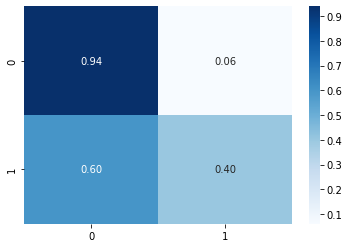

In [180]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Normalisasi confusion matrix
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]

# Membuat heatmap
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f')

Dari hasil confusion matrix, terlihat bahwa model memiliki kemampuan yang baik dalam memprediksi class 0(tidak akan mengalami keterlambatan pembayaran) dengan akurasi 94% pada true negative (class 0 diprediksi benar) dan 6% false positive (class 0 diprediksi salah). Namun, model memiliki kemampuan yang kurang baik dalam memprediksi class 1(akan mengalami keterlambatan pembayaran, hanya memiliki akurasi 40% pada true positive (class 1 diprediksi benar) dan 60% false negative (class 1 diprediksi salah)

##Try to Using Oversampling

In [181]:
# definisi Pipeline dengan SMOTE dan GradientBoostingClassifier
pipe_over_gb = make_pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(k_neighbors=6, sampling_strategy='minority', random_state=10)),
    ('gb', GradientBoostingClassifier())
])

In [182]:
# definisi hyperparameter space
param_over_grid = {
    'gb__n_estimators': [50, 100, 200],
    'gb__max_depth': [3, 4, 5],
    'gb__learning_rate': [0.1, 0.01, 0.001]
}

In [183]:
# inisialisasi GridSearchCV
grid_over_gb = GridSearchCV(
    pipe_over_gb, param_grid=param_over_grid, cv=5, n_jobs=-1, scoring='roc_auc'
)
smote = SMOTE(k_neighbors=6, sampling_strategy='minority', random_state=10)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
y_train_balanced.value_counts()

0    1616
1    1616
Name: default_payment_next_month, dtype: int64

In [184]:
# melatih model dengan Pipeline
pipe_over_gb.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote',
                 SMOTE(k_neighbors=6, random_state=10,
                       sampling_strategy='minority')),
                ('gb', GradientBoostingClassifier())])

In [185]:
# Check Train Results
print(classification_report(y_train, best_gb.predict(X_train)))
print(classification_report(y_train_balanced, pipe_over_gb.predict(X_train_balanced)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1616
           1       0.77      0.47      0.59       459

    accuracy                           0.85      2075
   macro avg       0.82      0.72      0.75      2075
weighted avg       0.84      0.85      0.84      2075

              precision    recall  f1-score   support

           0       0.70      0.87      0.78      1616
           1       0.83      0.63      0.72      1616

    accuracy                           0.75      3232
   macro avg       0.76      0.75      0.75      3232
weighted avg       0.76      0.75      0.75      3232



terlihat perbedaan antara data tidak yg menggunakan SMOTE dan data yg menggunakan SMOTE, terjadi peningkatan precision class minoritas (class 1) yg awalnya 0.77, menjadi 0.83, dan recall yg tadinya 0.47 menjadi 0.63

kesimpulannya : menggunakan SMOTE mampu meningkatkan kelas minoritas untuk data yg imbalance

#Model Saving

In [186]:
# Save the Files

with open('model_gradient_boosting.pkl', 'wb') as file_1:
  pickle.dump(best_gb, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_pipeline.pkl', 'wb') as file_3:
  pickle.dump(pipe_gb, file_3)